# IMDB Movies Project

## Questions
1. Which genres are the most common?
2. Which genres have a high average budget and revenue?
3. Which genres have a high average popularity?
4. Which genres have highest number of movies with a voting average of >= 8?

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('files/imdb_movies.csv')
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
movies.drop_duplicates(inplace=True)

In [6]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [7]:
# Drop null genres
movies.dropna(subset=['genres'], inplace=True)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [9]:
movies['profit'] = movies['revenue'] - movies['budget']

In [11]:
movies_genres = movies[['popularity', 'budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [12]:
movies_genres

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,7.4,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,0


In [15]:
from pandas import Series, DataFrame

split_genres = movies_genres['genres'].str.split('|').apply(Series,1).stack()

/var/folders/56/z2mlflg13lvbtkzjnd_zkt8r0000gn/T/ipykernel_6186/810196933.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split_genres = movies_genres['genres'].str.split('|').apply(Series,1).stack()


In [16]:
split_genres.index = split_genres.index.droplevel(-1)
split_genres

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [17]:
split_genres.name = 'genres_split'
del movies_genres['genres']
movies_genres = movies_genres.join(split_genres)

In [18]:
movies_genres

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


In [20]:
movies_gen_group = movies_genres.groupby('genres_split')

In [21]:
movies_gen_group

# Which genres are the most common?

In [57]:
genres_count = pd.DataFrame(movies_gen_group['original_title'].count().sort_values(ascending=False))
# genres_count.set_index('genres_split')
genres_count

,original_title
genres_split,
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

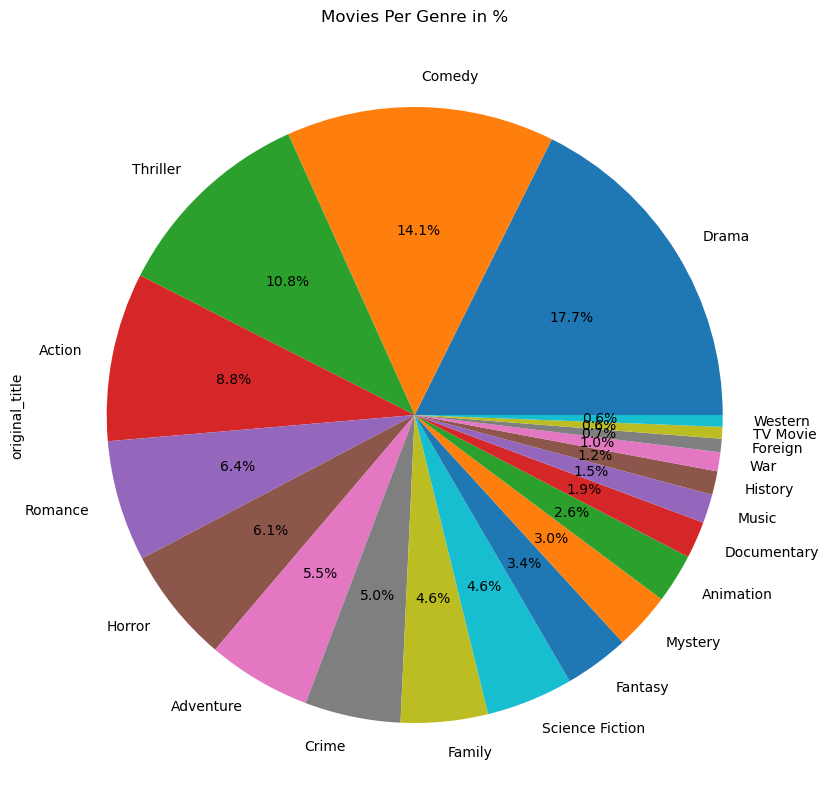

In [58]:
genres_count['original_title'].plot.pie(title='Movies Per Genre in %', autopct='%1.1f%%', figsize=(10,10))

In [59]:
pd.options.display.float_format = '{:2f}'.format

# Which genres have a high average budget and revenue?

In [60]:
high_avg_budget = movies_gen_group.mean(numeric_only=True)[['budget']].sort_values(by='budget', ascending=False)
high_avg_budget

,budget
genres_split,
Adventure,37543694.530931
Fantasy,32612585.348253
Action,27727820.331376
Science Fiction,24972680.524003
Family,23359337.420796
Animation,23159781.606581
War,20891886.103704
Western,18974107.975758
History,18594919.302395


In [61]:
high_avg_rev = movies_gen_group.mean(numeric_only=True)[['revenue']].sort_values(by='revenue', ascending=False)
high_avg_rev

,revenue
genres_split,
Adventure,113137861.069341
Fantasy,96313657.081878
Animation,75256062.223176
Action,72794732.002517
Family,72433176.373680
Science Fiction,70140558.034174
War,47605183.300000
Crime,42368661.645495
Thriller,41728417.543860


# Which genres have a high average popularity?

In [62]:
high_avg_pop = movies_gen_group.mean(numeric_only=True)[['popularity']].sort_values(by='popularity', ascending=False)
high_avg_pop

,popularity
genres_split,
Adventure,1.154259
Science Fiction,1.001548
Fantasy,0.992840
Action,0.926274
Animation,0.852182
Family,0.786668
Crime,0.744930
Thriller,0.741563
War,0.727683


# Which genres have highest number of movies with a voting average of >= 8?

In [39]:
high_count_vote = movies_genres[movies_genres['vote_average'] >= 8].groupby('genres_split').count()[['vote_average']].sort_values(by='vote_average', ascending=False)
high_count_vote

,vote_average
genres_split,
Documentary,34
Drama,30
Music,20
Comedy,14
Crime,12
Animation,9
Thriller,8
Family,7
Science Fiction,7
